<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/notebooks/starter_bankproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** INTRODUCTION**
https://byui-cse.github.io/cse450-course/module-02/intro.html

https://byui-cse.github.io/cse450-course/module-02/bank-dictionary.txt

You've just been hired as a junior data scientist for Banco Federal de Finanças in Aveiro, Portugal. They just finished a major telemarketing campaign and management was not happy with the results.

They feel like machine learning could help them create a more targeted campaign. You and your team have been brought in to discuss the situation.

**STAKEHOLDER FOCUS AREAS**

The shareholders are particularly interested in the following areas:


*   Finding interesting customer segments based on their previous marketing campaign.
*   Finding a way to identify the types of customers most likely to respond favorably to future marketing campaigns.

*  Proving to a skeptical Senhor Ferreira that a targeted campaign based on data science will significantly outperform a campaign made up of randomly selected customers.


You've been invited to dinner tomorrow night with the President of the bank, VP of Marketing, and the Senior Data Scientist. They're planning to discuss the marketing campaign and would like your input on a few key points.

## Libraries- Dataset

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for graphs
from sklearn.model_selection import train_test_split #Model Split to train
from sklearn.metrics import accuracy_score           #Accuracy model

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [2]:
campaign.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



## Table Description

In [3]:
campaign.describe(include='all')
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [4]:
campaign.nunique()
campaign['job'].unique()


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'unemployed', 'self-employed', 'unknown', 'management',
       'entrepreneur', 'student'], dtype=object)

In [5]:
#nun values
nan_count = campaign.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


## Dealing with Missing Values

https://jamesrledoux.com/code/imputation

In [6]:
#unkown values

(campaign=='unknown').sum()

age                  0
job                294
marital             69
education         1535
default           7725
housing            894
loan               894
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [7]:
campaign[campaign.default=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
14,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36790,70,retired,married,basic.4y,unknown,no,no,cellular,oct,thu,1,14,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
36843,49,admin.,married,high.school,unknown,no,no,cellular,oct,wed,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
36844,66,retired,married,basic.4y,unknown,unknown,unknown,cellular,oct,wed,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
36867,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,fri,4,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no


In [8]:
# from unkown to NAN
import numpy as np
df = campaign
df.replace(r"unknown", np.nan, inplace=True)

In [14]:
df.isnull().sum()
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
# most common imputed

df_im = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_im.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
# label encoded values of the "marital" column

df_im['marital'] = df_im['marital'].astype('category')
df_im['marital_Encoded'] = df_im['marital'].cat.codes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_Encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2


## Data Table Analysis

Text(0.5, 1.0, 'Age Histogram')

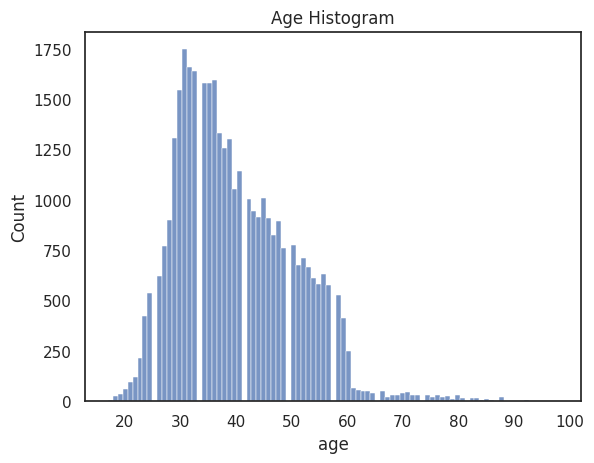

In [39]:
sns.set()
sns.set_style('white')
graph1=sns.histplot(data=df_im, x='age', bins='auto')#hue='species'
graph1.set_title("Age Histogram")

Text(0.5, 1.0, 'Reponse age by Campain')

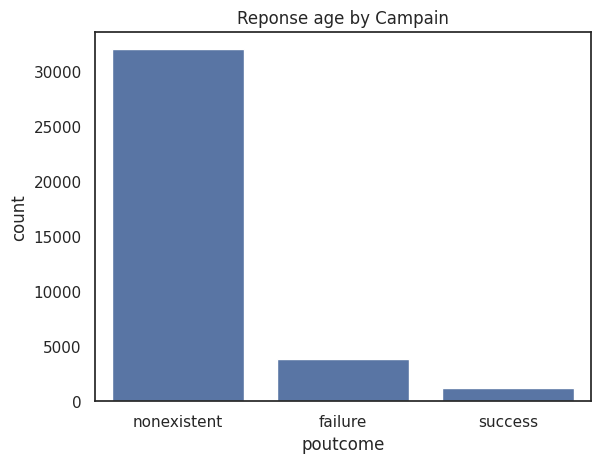

In [48]:
sns.set()
sns.set_style('white')
graph2=sns.countplot(data=df_im, x='poutcome')
graph2.set_title("Reponse age by Campain")
